# COGS 118A - Final Project

# Classing Stars by Using Their Unique Features

# Names

The Elite Fantasy Team.

- Boning Yang (BY)
- Chenhao Zhu (CZ)
- Jason Chen (JC)
- Muchan Li (ML)
- Anni Li (AL)

# Abstract 
We see thousands of stars hanging up high each night but rarely do we come to wonder about their commonalities and differences. For our project, we decide to train a model to classify each star Morgan-Keenan spectral class by using their unique features. We especially pay attention to the brightness, color, and magnitude of the stars since they are the decisive distinctions. After cleaning the data, we will build two separate models with our dataset–SVC and K Nearest Neighbor algorithm, while paying attention to the accuracy, precision, and recall. We expect to achieve a high classification accuracy ( score above 90) so that we can confidently rely on our model to make convenient yet precise predictions when a new star is observed.

# Background

Since astronomy is a brand new field of wonder to every one of our team, we did a great deal of crash course and factual research in order to better position ourselves to answer the question we came up with.

First off, what is the Morgan-Keenan spectral classification system? In short, it is a systematic way introduced by William Wilson Morgan and Philip C. Keenan in 1943 that assigns spectral classification to stars based on their effective temperature. The scale, in descending order, is as follows:
- O, >= 30,000 Kelvin,
- B, between 10,000 and 30,000 Kelvin
- A, between 7,500 and 10,000 Kelvin
- F, between 6,000 and 7,500 Kelvin
- G, between 5,200 and 6,000 Kelvin
- K, between 3,700 and 5,200 Kevlin
- M, between 2,400 and 3,700 Kelvin

We even found an interesting trick to recite this hierarchy, that is "**O**h **B**e **A** **F**ine **G**irl (**G**uy), **K**iss **M**e". More factual information about spectral types and the MK system can be found here<a name="MK"></a>[<sup>[1]</sup>](#MK)

Now, some may wonder that since it seems there is a rather obvious connection between stellar temperature and its MK spectral class, why not just scrape the temperature data and match them up? The one apparent objection we've found in regard to this is that the "temperature" measurement isn't something that can just be taken for granted (notice that our dataset doesn't have the temperature feature either)--it requires tremendous amount of pre-assumptions, observations, and calculations, and in the end the result one astrophysicist would arrive at may not even be accurate<a name="stellartemp"></a>[<sup>[2]</sup>](#stellartemp). In a more scholarly article<a name="infrared"></a>[<sup>[3]</sup>](#infrared), the authors proposed a revised Infrared Flux method to determine stellar effective temperature with reduced numerical working and further insight into the method. They revisited the assumption that the effective temperature $T_e$ is related to integrated stellar flux and monochromatic stellar flux; combining these two relations, they derived a equation that gives the ratio of integrated stellar flux to monochromatic flux, which also includes the $T_e$ term and can be solved for. However, as they later concluded in the "Sensitivity and Accuracy of Method" section, the accuracy of the Infrared Flux method is limited by the accuracy with which the ratio can be measured, which in turn depends on the accuracy of the absolute flux measurements across spectral regions. In a more recent research paper<a name="gaia"></a>[<sup>[4]</sup>](#gaia), in fact, 40 years after the first reference article was published, we are presented with yet another advancement in precise derivation of stellar effective temperature. Nonetheless, the Gaia EDR3 photometry method is still bounded by other measurements and factors like the $K_s$ band, Gaia color, stellar blending, etc. All these prove that "temperature" is not a measurement as straightforward as it may seem when it comes to astronomy.

Hence, we believe if we are able to use machine learning techniques to "brute-forcedly" and reliably classify a star, it would make this classification process more interpretable to astronomy newbies like us and the save the experts a great deal of work all at once when deriving the stellar temperature is not absolutely necessary.

# Problem Statement

In this project, we propose to predict the Morgan-Keenan spectral class of a given/newly-observed star using the minimum number of features from a pool of features such as luminosity, absolute visual magnitude, right ascension/declination, etc. while maintaining above 90% accuracy. This problem can be approached by practical machine learning methods such as decision tree, KNN, etc. The result can be evaluated by the accuracy comparing the predicted category and the real category in our training & testing dataset. With correct method and model, this solution should be replicable

# Data

### Dataset name:

- hygdata_v3.csv

### Github link:

- https://github.com/astronexus/HYG-Database

### Size of the dataset:

- This dataset has 36 variables and 119613 observations. The actual shape of this dataset is 119,614 rows × 37 columns

### What an observation consists of:

- Each observation contains the location (where the star is located and how far it is) and some critical characteristics of each star, including its brightness, energy, color, etc. There are a total of 36 variables in each observation (some of the variables might not be available) We will use some of the critical variables below to classify star types.

### Some critical variables in the dataset:

- Spect: The star's spectral type. There are seven main types of stars: OBAFGKM, where O corresponds to the hottest, most powerful stars (and usually the largest) and M corresponds to the coolest, least powerful stars (and usually the smallest). The spectral type of the star will be the labels in our supervised machine learning model.
- Distance: The star's distance in parsecs. Distance is one of the traits that we need to consider in our model because the farther away the star is from, the dimmer the star will be. We will need to use distance to more accurately measure the luminosity and the brightness of the stars.
- Mag: The star's apparent visual magnitude. We will use the star’s apparent magnitude to determine how bright the star actually is if we observe it from the earth.
- AbsMag: The star's absolute visual magnitude, which will be the start’s visual magnitude if we observe 10 parsecs away from the star.  This identity is crucial because it tells us how bright the star “actually” is. If a star’s absolute visual magnitude is high, it is very likely that the star has a large size and high energy.
- Ci: The start’s B-V color index. This index will indicate the star’s color, which will be an efficient way to indicate the star’s temperature and energy. It is defined as the difference between the blue magnitude and the star’s visual magnitude. The larger the B-V color index, the higher temperature the star will be at (and also, the star will appear bluer)
- Lum: The star's luminosity. This variable is defined by the total electromagnetic power emitted by the star in a given time, and it is shown as a multiple of the solar luminosity (where the sun’s luminosity will be defined as 1). The higher the luminosity the star is, the more energy it will release in a given time period. In other words, the higher the luminosity, the more powerful the star is.

### Any special handling, transformations, cleaning, etc will be needed:

- This dataset contains some variables that we will not be used in classification so we will clean the data to make sure we only have the data we need. Also, the star’s spectral type contains a subtype for each class. For example, in class F, we might have F5 or F0V, etc. We will also clean the data so that we only use the general type to classify star type in order to reduce model complexity.

# Proposed Solution



In [4]:
# Here are the packages we will use
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

- First, we will use pandas packages to import, clean, and modify our dataset
- Second, we will use data balancing functions from skleanr.metrics to balance our data
- Third, we will use train-test split and KFold functions from skleanrn.model_selection to carry out train-test dataset split and cross validation
- Fourth, we will train our decision tree classifier and KNN classifier (and possibly more classification algorithms) with optimal parameters using the sklearn.tree and sklearn.neighbors
- Fifth, we will test our model against the test set and obtain test metrics using sklearn.metrics
- Sixth, we will use plotting methods from seaborn and matplotlib to visualize our testing metrics and confusion matrices
- Seventh, we will repeat the above model training pipeline to prune and optimize for models with simpler features, i.e. less splits, shallower depth, less neighbors.

Finally, alongside these 7 general step procedures of model training, we will build a grid search pipeline at each stage of our model (where a stage in our design refers to a model trained using a certain number of parameters) until we arrive at one that is the simplest yet still accurately (above 90% accuracy score) captures the information. It is also important to note that we will not aim for exhaustively trialing out all combinations of features to our model (i.e. listing all combinations of 3 out of 10 features and tuning the best model for each), we instead aim to construct one that is most intuitive and easy to visualize.

## Data Cleaning and Feature Engineering

We will first drop all columns that are completely irrelevant to making Morgan-Keegan spectral class prediction. With reference to the <a href='https://github.com/astronexus/HYG-Database'>data dictionary</a>, these columns are the following:<br>
1. `id`: the database primary key.<br>
2. `hip`: the star's ID in the Hipparcos catalog, if known.<br>
3. `hd`: the star's ID in the Henry Draper catalog, if known.<br>
4. `hr`: the star's ID in the Harvard Revised catalog, which is the same as its number in the Yale Bright Star Catalog.<br>
5. `gl`: the star's ID in the third edition of the Gliese Catalog of Nearby Stars.<br>
6. `bf`: the Bayer / Flamsteed designation, primarily from the Fifth Edition of the Yale Bright Star Catalog. This is a combination of the two designations. The Flamsteed number, if present, is given first; then a three-letter abbreviation for the Bayer Greek letter; the Bayer superscript number, if present; and finally, the three-letter constellation abbreviation. Thus Alpha Andromedae has the field value "21Alp And", and Kappa1 Sculptoris (no Flamsteed number) has "Kap1Scl".<br>
7. (`ra`, `dec`): the star's right ascension and declination, for epoch and equinox 2000.0.<br>
8. `proper`: a common name for the star, such as "Barnard's Star" or "Sirius". I have taken these names primarily from the Hipparcos project's web site, which lists representative names for the 150 brightest stars and many of the 150 closest stars. I have added a few names to this list. Most of the additions are designations from catalogs mostly now forgotten (e.g., Lalande, Groombridge, and Gould ["G."]) except for certain nearby stars which are still best known by these designations.<br>
9. (`pmra`, `pmdec`): the star's proper motion in right ascension and declination, in milliarcseconds per year.<br>
10. `bayer`: the Bayer designation as a distinct value.<br>
11. `flam`: the Flamsteed number as a distinct value.<br>
12. `con`: the standard constellation abbreviation.<br>
13. `comp`: ID of companion star.<br>
14. `comp_primary`: ID of primary star for this component.<br>
15. `base`: catalog ID or name for this multi-star system. Currently only used for Gliese stars.<br>
16. `var`: star's standard variable star designation, when known.<br>
17. (`var_min`, `var_max`): star's approximate magnitude range, for variables. This value is based on the Hp magnitudes for the range in the original Hipparcos catalog, adjusted to the V magnitude scale to match the "mag" field.

In [5]:
HYG = pd.read_csv('hygdata_v3.csv')
HYG.head()

id  hip        hd  hr   gl   bf proper        ra        dec      dist  ...  \
0   0  NaN       NaN NaN  NaN  NaN    Sol  0.000000   0.000000    0.0000  ...   
1   1  1.0  224700.0 NaN  NaN  NaN    NaN  0.000060   1.089009  219.7802  ...   
2   2  2.0  224690.0 NaN  NaN  NaN    NaN  0.000283 -19.498840   47.9616  ...   
3   3  3.0  224699.0 NaN  NaN  NaN    NaN  0.000335  38.859279  442.4779  ...   
4   4  4.0  224707.0 NaN  NaN  NaN    NaN  0.000569 -51.893546  134.2282  ...   

   bayer  flam  con  comp  comp_primary base         lum  var  var_min  \
0    NaN   NaN  NaN     1             0  NaN    1.000000  NaN      NaN   
1    NaN   NaN  Psc     1             1  NaN    9.638290  NaN      NaN   
2    NaN   NaN  Cet     1             2  NaN    0.392283  NaN      NaN   
3    NaN   NaN  And     1             3  NaN  386.901132  NaN      NaN   
4    NaN   NaN  Phe     1             4  NaN    9.366989  NaN      NaN   

   var_max  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  

[5 rows x 37 columns]

In [6]:
HYG = HYG.drop(columns = ["id", "hip", "hd", "hr", "gl", "bf", "ra", "dec", "proper", "pmra", "pmdec",
                          "bayer", "flam", "con", "comp", "comp_primary", "base", "var", "var_min", "var_max"])
HYG.head(10)

dist    rv    mag  absmag         spect     ci           x         y  \
0    0.0000   0.0 -26.70   4.850           G2V  0.656    0.000005  0.000000   
1  219.7802   0.0   9.10   2.390            F5  0.482  219.740502  0.003449   
2   47.9616   0.0   9.27   5.866           K3V  0.999   45.210918  0.003365   
3  442.4779   0.0   6.61  -1.619            B9 -0.019  344.552785  0.030213   
4  134.2282   0.0   8.06   2.421           F0V  0.370   82.835513  0.012476   
5  257.7320   0.0   8.55   1.494         G8III  0.902  195.714261  0.034068   
6   55.0358   0.0  12.31   8.607          M0V:  1.336   54.905296  0.017912   
7   57.8704   0.0   9.64   5.828            G0  0.740   54.367897  0.020886   
8  200.8032 -31.0   9.05   2.536  M6e-M8.5e Tc  1.102  180.654532  0.086213   
9  420.1681   0.0   8.59   0.473            G5  1.067  337.379614  0.207994   

            z            vx        vy            vz     rarad    decrad  \
0    0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000  0.000000   
1    4.177065  4.000000e-08 -0.000006 -2.000000e-06  0.000016  0.019007   
2  -16.008996 -7.000000e-08  0.000042 -2.000000e-07  0.000074 -0.340319   
3  277.614965  3.920000e-06  0.000011 -4.860000e-06  0.000088  0.678222   
4 -105.619540  8.000000e-08  0.000041  6.000000e-08  0.000149 -0.905713   
5 -167.695291  7.370000e-06  0.000003  8.610000e-06  0.000174 -0.708450   
6    3.787796  2.200000e-07  0.000060 -3.420000e-06  0.000326  0.068879   
7   19.827115  1.932000e-05 -0.000058 -5.292000e-05  0.000385  0.349696   
8   87.668389 -2.613000e-05  0.000019 -1.880000e-05  0.000477  0.451804   
9  250.431996 -1.021000e-05 -0.000013  1.377000e-05  0.000617  0.638545   

        pmrarad      pmdecrad         lum  
0  0.000000e+00  0.000000e+00    1.000000  
1 -2.521031e-08 -9.114497e-09    9.638290  
2  8.785309e-07 -4.508767e-09    0.392283  
3  2.540424e-08 -1.410808e-08  386.901132  
4  3.047054e-07  7.757010e-10    9.366989  
5  1.226579e-08  4.397260e-08   21.998851  
6  1.097085e-06 -6.225008e-08    0.031420  
7 -1.008994e-06 -9.734574e-07    0.406256  
8  9.255093e-08 -2.744045e-08    8.425584  
9 -3.054326e-08  4.082131e-08   56.337815

In [7]:
print(f'The dataset now contains {HYG.shape[0]} observations and {HYG.shape[1]} features')

The dataset now contains 119614 observations and 17 features


In [8]:
# Overview of missing information
HYG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dist      119614 non-null  float64
 1   rv        119614 non-null  float64
 2   mag       119614 non-null  float64
 3   absmag    119614 non-null  float64
 4   spect     116564 non-null  object 
 5   ci        117732 non-null  float64
 6   x         119614 non-null  float64
 7   y         119614 non-null  float64
 8   z         119614 non-null  float64
 9   vx        119614 non-null  float64
 10  vy        119614 non-null  float64
 11  vz        119614 non-null  float64
 12  rarad     119614 non-null  float64
 13  decrad    119614 non-null  float64
 14  pmrarad   119614 non-null  float64
 15  pmdecrad  119614 non-null  float64
 16  lum       119614 non-null  float64
dtypes: float64(16), object(1)
memory usage: 15.5+ MB


### Handling and Imputing Missing Values

From the information presented above, we noticed the missing values `NaN` are mainly found in the `spect` and `ci` columns.<br>
Since we cannot make up for missing `spec` information (it is what we aim to predict in the first place), we will simply handle it by dropping any row (star) whose `spec` is empty.<br>
Also, we came to realize that our `spec` has spectral types other than the 7 outlined in the MK naming hierarchy (because it was originally recorded using a separate naming system). While some classes can be translated to the MK system, others cannot. Overall, due to lack of documentation and domain knowledge, we will try our best to carry out this translation.

In [9]:
missing_spec_index = HYG[HYG['spect'].isnull()].index
HYG = HYG.drop(labels = missing_spec_index)
HYG.head(10)

dist    rv    mag  absmag         spect     ci           x         y  \
0    0.0000   0.0 -26.70   4.850           G2V  0.656    0.000005  0.000000   
1  219.7802   0.0   9.10   2.390            F5  0.482  219.740502  0.003449   
2   47.9616   0.0   9.27   5.866           K3V  0.999   45.210918  0.003365   
3  442.4779   0.0   6.61  -1.619            B9 -0.019  344.552785  0.030213   
4  134.2282   0.0   8.06   2.421           F0V  0.370   82.835513  0.012476   
5  257.7320   0.0   8.55   1.494         G8III  0.902  195.714261  0.034068   
6   55.0358   0.0  12.31   8.607          M0V:  1.336   54.905296  0.017912   
7   57.8704   0.0   9.64   5.828            G0  0.740   54.367897  0.020886   
8  200.8032 -31.0   9.05   2.536  M6e-M8.5e Tc  1.102  180.654532  0.086213   
9  420.1681   0.0   8.59   0.473            G5  1.067  337.379614  0.207994   

            z            vx        vy            vz     rarad    decrad  \
0    0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000  0.000000   
1    4.177065  4.000000e-08 -0.000006 -2.000000e-06  0.000016  0.019007   
2  -16.008996 -7.000000e-08  0.000042 -2.000000e-07  0.000074 -0.340319   
3  277.614965  3.920000e-06  0.000011 -4.860000e-06  0.000088  0.678222   
4 -105.619540  8.000000e-08  0.000041  6.000000e-08  0.000149 -0.905713   
5 -167.695291  7.370000e-06  0.000003  8.610000e-06  0.000174 -0.708450   
6    3.787796  2.200000e-07  0.000060 -3.420000e-06  0.000326  0.068879   
7   19.827115  1.932000e-05 -0.000058 -5.292000e-05  0.000385  0.349696   
8   87.668389 -2.613000e-05  0.000019 -1.880000e-05  0.000477  0.451804   
9  250.431996 -1.021000e-05 -0.000013  1.377000e-05  0.000617  0.638545   

        pmrarad      pmdecrad         lum  
0  0.000000e+00  0.000000e+00    1.000000  
1 -2.521031e-08 -9.114497e-09    9.638290  
2  8.785309e-07 -4.508767e-09    0.392283  
3  2.540424e-08 -1.410808e-08  386.901132  
4  3.047054e-07  7.757010e-10    9.366989  
5  1.226579e-08  4.397260e-08   21.998851  
6  1.097085e-06 -6.225008e-08    0.031420  
7 -1.008994e-06 -9.734574e-07    0.406256  
8  9.255093e-08 -2.744045e-08    8.425584  
9 -3.054326e-08  4.082131e-08   56.337815

In [10]:
print(f'The dataset now has {HYG.shape[0]} observations after stars with missing spectral type are dropped')

The dataset now has 116564 observations after stars with missing spectral type are dropped


In [11]:
def find_cap_character(string):
    return re.findall('[A-Z]', string)

In [12]:
cap_chars = HYG['spect'].apply(find_cap_character)
cap_chars

0         [G, V]
1            [F]
2         [K, V]
3            [B]
4         [F, V]
           ...  
119609        []
119610        []
119611       [M]
119612       [M]
119613    [D, A]
Name: spect, Length: 116564, dtype: object

In [13]:
MK_star_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

In [14]:
first_cap_char = [cap_char_list[0] if len(cap_char_list) >= 1 else np.NaN for cap_char_list in cap_chars]
first_cap_char[:10]

['G', 'F', 'K', 'B', 'F', 'G', 'M', 'G', 'M', 'G']

In [15]:
naive_MK_spect = [cap_char if cap_char in MK_star_types else np.NaN for cap_char in first_cap_char]
naive_MK_spect[:10]

['G', 'F', 'K', 'B', 'F', 'G', 'M', 'G', 'M', 'G']

In [16]:
HYG['spect'] = naive_MK_spect
missing_spec_index_1 = HYG[HYG['spect'].isnull()].index
HYG = HYG.drop(labels = missing_spec_index_1)
HYG.head()

dist   rv    mag  absmag spect     ci           x         y  \
0    0.0000  0.0 -26.70   4.850     G  0.656    0.000005  0.000000   
1  219.7802  0.0   9.10   2.390     F  0.482  219.740502  0.003449   
2   47.9616  0.0   9.27   5.866     K  0.999   45.210918  0.003365   
3  442.4779  0.0   6.61  -1.619     B -0.019  344.552785  0.030213   
4  134.2282  0.0   8.06   2.421     F  0.370   82.835513  0.012476   

            z            vx        vy            vz     rarad    decrad  \
0    0.000000  0.000000e+00  0.000000  0.000000e+00  0.000000  0.000000   
1    4.177065  4.000000e-08 -0.000006 -2.000000e-06  0.000016  0.019007   
2  -16.008996 -7.000000e-08  0.000042 -2.000000e-07  0.000074 -0.340319   
3  277.614965  3.920000e-06  0.000011 -4.860000e-06  0.000088  0.678222   
4 -105.619540  8.000000e-08  0.000041  6.000000e-08  0.000149 -0.905713   

        pmrarad      pmdecrad         lum  
0  0.000000e+00  0.000000e+00    1.000000  
1 -2.521031e-08 -9.114497e-09    9.638290  
2  8.785309e-07 -4.508767e-09    0.392283  
3  2.540424e-08 -1.410808e-08  386.901132  
4  3.047054e-07  7.757010e-10    9.366989

In [17]:
print(f'The dataset now has {HYG.shape[0]} observations after filtering nonconventional MK spectral type stars')

The dataset now has 115276 observations after filtering nonconventional MK spectral type stars


On the other hand, since `ci` is a column that contains continuous values, we can handle the missing values within by imputing them with the mean color index of each spectral group.

In [18]:
HYG['ci']

0         0.656
1         0.482
2         0.999
3        -0.019
4         0.370
          ...  
119603    1.500
119605      NaN
119606      NaN
119611    1.640
119612      NaN
Name: ci, Length: 115276, dtype: float64

In [19]:
def mean_impute(series: pd.Series):
    return series.fillna(series.mean())

In [20]:
HYG.groupby('spect')['ci'].transform(mean_impute)

0         0.656000
1         0.482000
2         0.999000
3        -0.019000
4         0.370000
            ...   
119603    1.500000
119605    1.555152
119606    1.555152
119611    1.640000
119612    1.555152
Name: ci, Length: 115276, dtype: float64

In [21]:
HYG['ci'] = HYG.groupby('spect')['ci'].transform(mean_impute)
HYG.tail(10)

dist   rv    mag  absmag spect        ci          x         y  \
119592  21.2766  0.0  13.57  11.930     M  1.555152  20.924183 -0.981973   
119593  25.0000  0.0  11.39   9.400     M  1.450000  24.709421 -1.119754   
119596  12.9870  0.0  11.50  10.932     M  1.450000  12.780938 -0.524501   
119600  10.7898  0.0  11.70  11.535     M  1.555152   2.692069 -0.089412   
119601  25.6410  0.0  13.30  11.255     M  1.555152  19.183393 -0.493876   
119603  23.2558  0.0  13.01  11.177     M  1.500000  23.013520 -0.558489   
119605  17.8571  0.0  12.93  11.671     M  1.555152  17.399674 -0.201634   
119606  17.8571  0.0  12.98  11.721     M  1.555152  17.399776 -0.202900   
119611  18.5185  0.0  12.82  11.482     M  1.640000  13.305832 -0.013199   
119612  12.8205  0.0  12.80  12.260     M  1.555152  10.614642 -0.006882   

                z            vx        vy            vz     rarad    decrad  \
119592   3.729342  6.310000e-06  0.000005 -3.419000e-05  6.236290  0.176189   
119593   3.631897  6.180000e-06  0.000005 -4.037000e-05  6.237899  0.145792   
119596   2.243810 -1.990000e-06  0.000036  1.990000e-05  6.242168  0.173645   
119600  10.448184 -2.220000e-06  0.000016  7.100000e-07  6.249769  1.318489   
119601 -17.006304 -1.500000e-05  0.000061 -1.871000e-05  6.257406 -0.725148   
119603   3.301243 -6.000000e-08 -0.000032 -5.060000e-06  6.258923  0.142435   
119605  -4.010825  5.800000e-07  0.000016  1.680000e-06  6.271596 -0.226539   
119606  -4.010319  5.800000e-07  0.000016  1.680000e-06  6.271524 -0.226510   
119611 -12.879810  1.682000e-05 -0.000002  1.737000e-05  6.282195 -0.769130   
119612  -7.189893 -2.172000e-05  0.000045 -3.214000e-05  6.282501 -0.595366   

             pmrarad      pmdecrad       lum  
119592  2.294138e-07 -1.632324e-06  0.001472  
119593  2.294138e-07 -1.632324e-06  0.015136  
119596  2.795872e-06  1.556160e-06  0.003691  
119600  1.430540e-06  2.625508e-07  0.002118  
119601  2.377332e-06 -9.750136e-07  0.002742  
119603 -1.388652e-06 -2.199357e-07  0.002946  
119605  9.161039e-07  9.628400e-08  0.001869  
119606  9.161039e-07  9.628400e-08  0.001785  
119611 -9.129042e-08  1.305807e-06  0.002224  
119612  3.470684e-06 -3.027691e-06  0.001086

In [22]:
HYG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115276 entries, 0 to 119612
Data columns (total 17 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   dist      115276 non-null  float64
 1   rv        115276 non-null  float64
 2   mag       115276 non-null  float64
 3   absmag    115276 non-null  float64
 4   spect     115276 non-null  object 
 5   ci        115276 non-null  float64
 6   x         115276 non-null  float64
 7   y         115276 non-null  float64
 8   z         115276 non-null  float64
 9   vx        115276 non-null  float64
 10  vy        115276 non-null  float64
 11  vz        115276 non-null  float64
 12  rarad     115276 non-null  float64
 13  decrad    115276 non-null  float64
 14  pmrarad   115276 non-null  float64
 15  pmdecrad  115276 non-null  float64
 16  lum       115276 non-null  float64
dtypes: float64(16), object(1)
memory usage: 15.8+ MB


As we can now see, we reduced our number of observations down to 115276 observations, but without any missing value across any column/feature.

# Data Visualization and Feature Selection

Due to the sheer volume of our stars dataset, we will be subsetting our original dataset and only use a random sample of it to do visualization. The sample of stars should be representative enough of the whole.

In [25]:
import plotly.express as px
from IPython.display import Image

In [24]:
df_to_visualize = HYG.sample(frac=0.1)
df_to_visualize.head()

dist   rv   mag  absmag spect     ci           x           y  \
48530  328.9474  0.0  7.64   0.054     B -0.082 -146.142451   88.198199   
30912  137.1742  0.0  8.92   3.234     F  0.409  -10.033172   75.794015   
80729   51.7063  3.0  4.45   0.882     A  0.130  -17.999307  -44.626441   
53443  175.7469  0.0  9.10   2.876     F  0.230 -151.997391   42.191750   
48937  546.4481  0.0  7.07  -1.618     K  1.544 -473.675183  270.763921   

                z        vx        vy        vz     rarad    decrad  \
48530 -281.193624  0.000007  0.000026  0.000004  2.598598 -1.025220   
30912  113.891896 -0.000002  0.000002 -0.000002  1.702405  0.979595   
80729  -18.922208  0.000002 -0.000008  0.000007  4.329013 -0.374659   
53443   77.483043  0.000003  0.000017 -0.000003  2.870828  0.456577   
48937  -30.401424  0.000025  0.000046  0.000010  2.622300 -0.055663   

            pmrarad      pmdecrad         lum  
48530 -7.858830e-08  2.496790e-08   82.870508  
30912  1.536859e-08 -2.302865e-08    4.429962  
80729  9.798084e-08  1.756480e-07   38.654495  
53443 -9.904743e-08 -1.711392e-08    6.160274  
48937 -9.545981e-08  1.755026e-08  386.544947

In [26]:
fig = px.scatter_3d(df_to_visualize, x='x', y='y', z='z', color='spect', opacity=0.75, width=800, height=500)
fig.show('notebook')

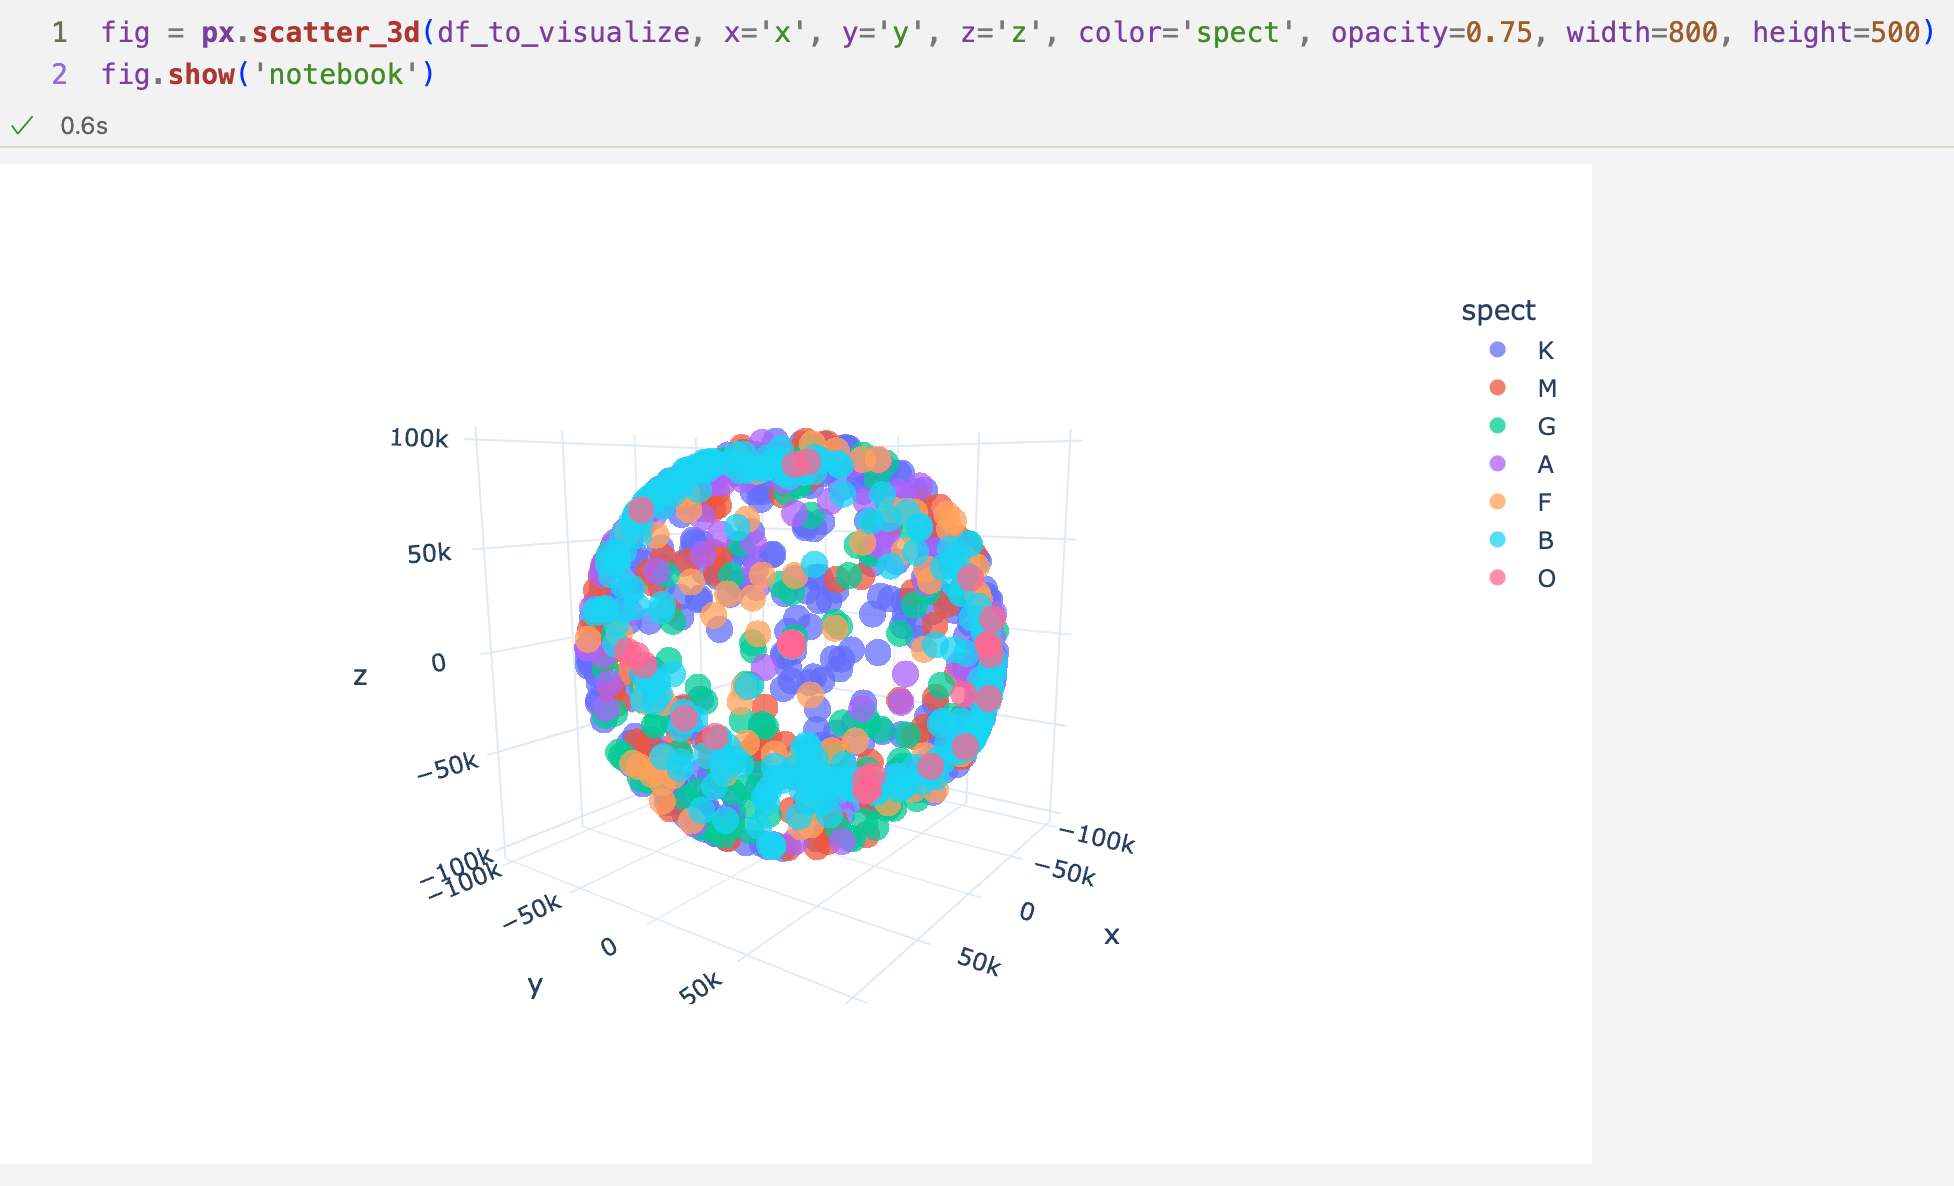

In [27]:
# If the above 3D interactive graph is not rendered, check out the image below
Image('img/xyz.png')

This 3D plot shows the stars' spect distribution with their Cartesian Coordinates relative to us, where x,y,z are Cartesian coordinates as seen from Earth. From this plot, we can see that there is not an obvious relation between spect and the position of the star in Cartesian Coordinate.

In [28]:
fig = px.scatter_3d(df_to_visualize, x='vx', y='vy', z='vz', color='spect', opacity=0.75, width=800, height=500)
fig.show()

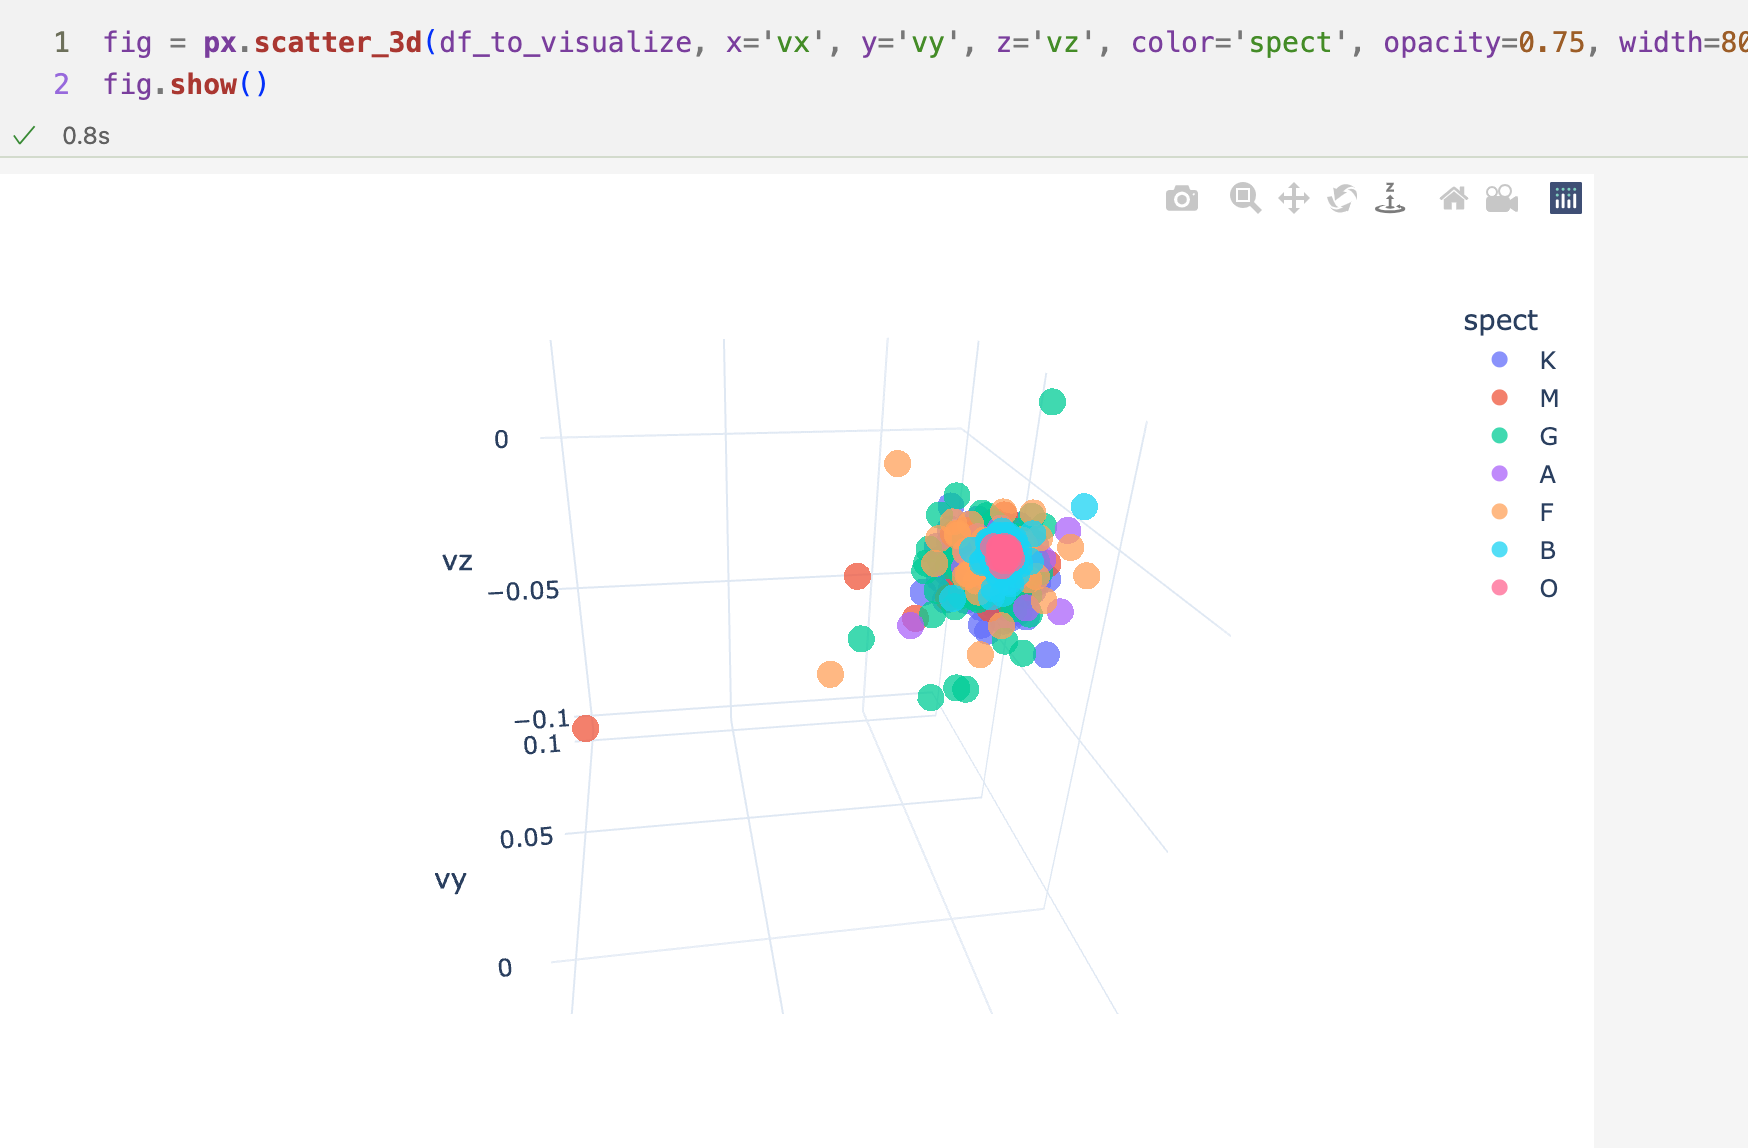

In [29]:
# If the above 3D interactive graph is not rendered, check out the image below
Image('img/vxvyvz.png')

This plot shows the stars' spect distribution with the Cartesian velocity components of the star with respect to Earth. The velocity unit is parsecs per year. From this plot, we notice that there seems to be a relationship between spect and velocity: take earth (v = 0) as the center of a sphere, the stars closest to earth's coordinate, meaning that they have comparatively lower speeds, are mostly O type; then with the magnitude of velocity increasing, the majoraty stars are of type B, F, and then G. However, if we zoom in to see details, we'll find that the distribution is still random and chaos, which may need further inspect with 2-D plots.

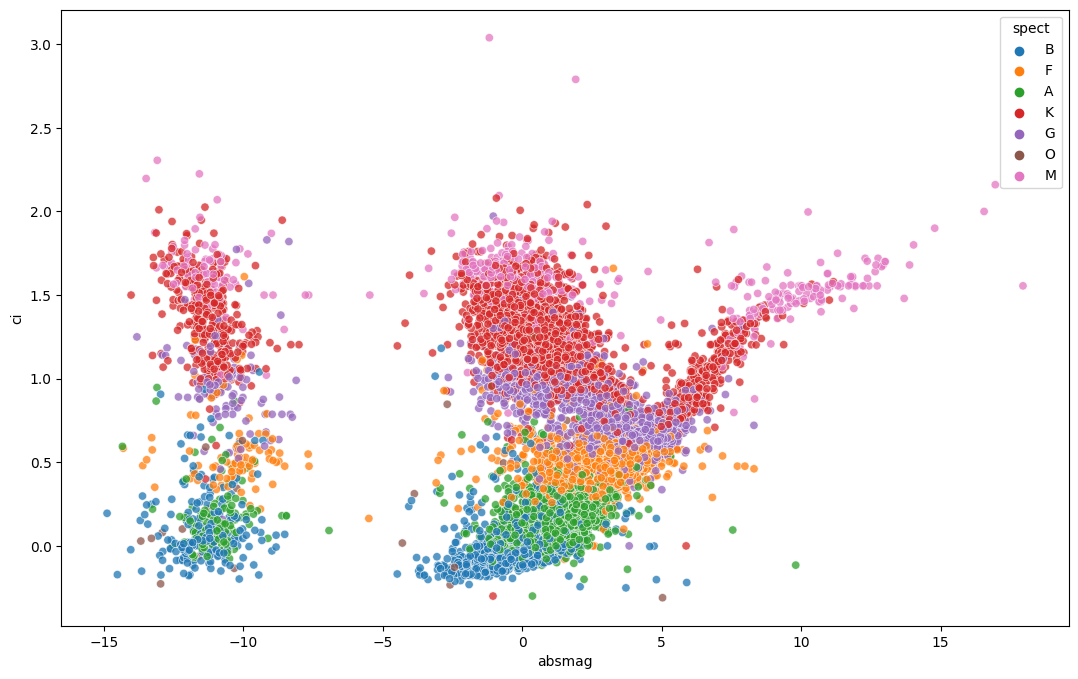

In [30]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df_to_visualize, x='absmag', y='ci', hue='spect', alpha=0.75)
plt.show()

This plot shows the distribution of spect with respect with ci(The star's color index) and absmag (The star's absolute visual magnitude). We notice that there is a gap in between absmag = -10~-5. Also we can see that from ci=0 to ci=2.0, the star type are correspondingly B,A,F,G,K,M. This is the most strong correlation we have seen from plots so far, which might indicate that we should add more weights on variable ci in the model training process.

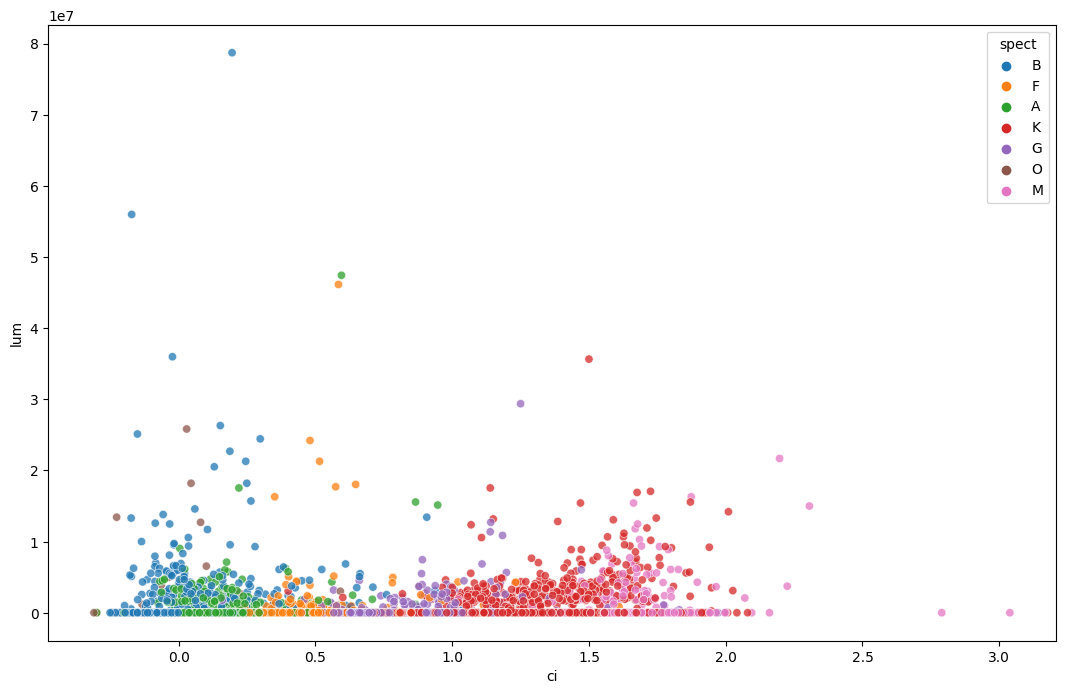

In [31]:
plt.figure(figsize=(13, 8))
sns.scatterplot(data=df_to_visualize, x='ci', y='lum', hue='spect', alpha=0.75)
plt.show()

This plot shows the distribution of spect with luminocity and ci. We can see a clearer correlation between spect and ci.

In [32]:
fig = px.scatter_3d(df_to_visualize, x='absmag', y='ci', z='lum', color='spect', opacity=0.75, width=800, height=500)
fig.show()

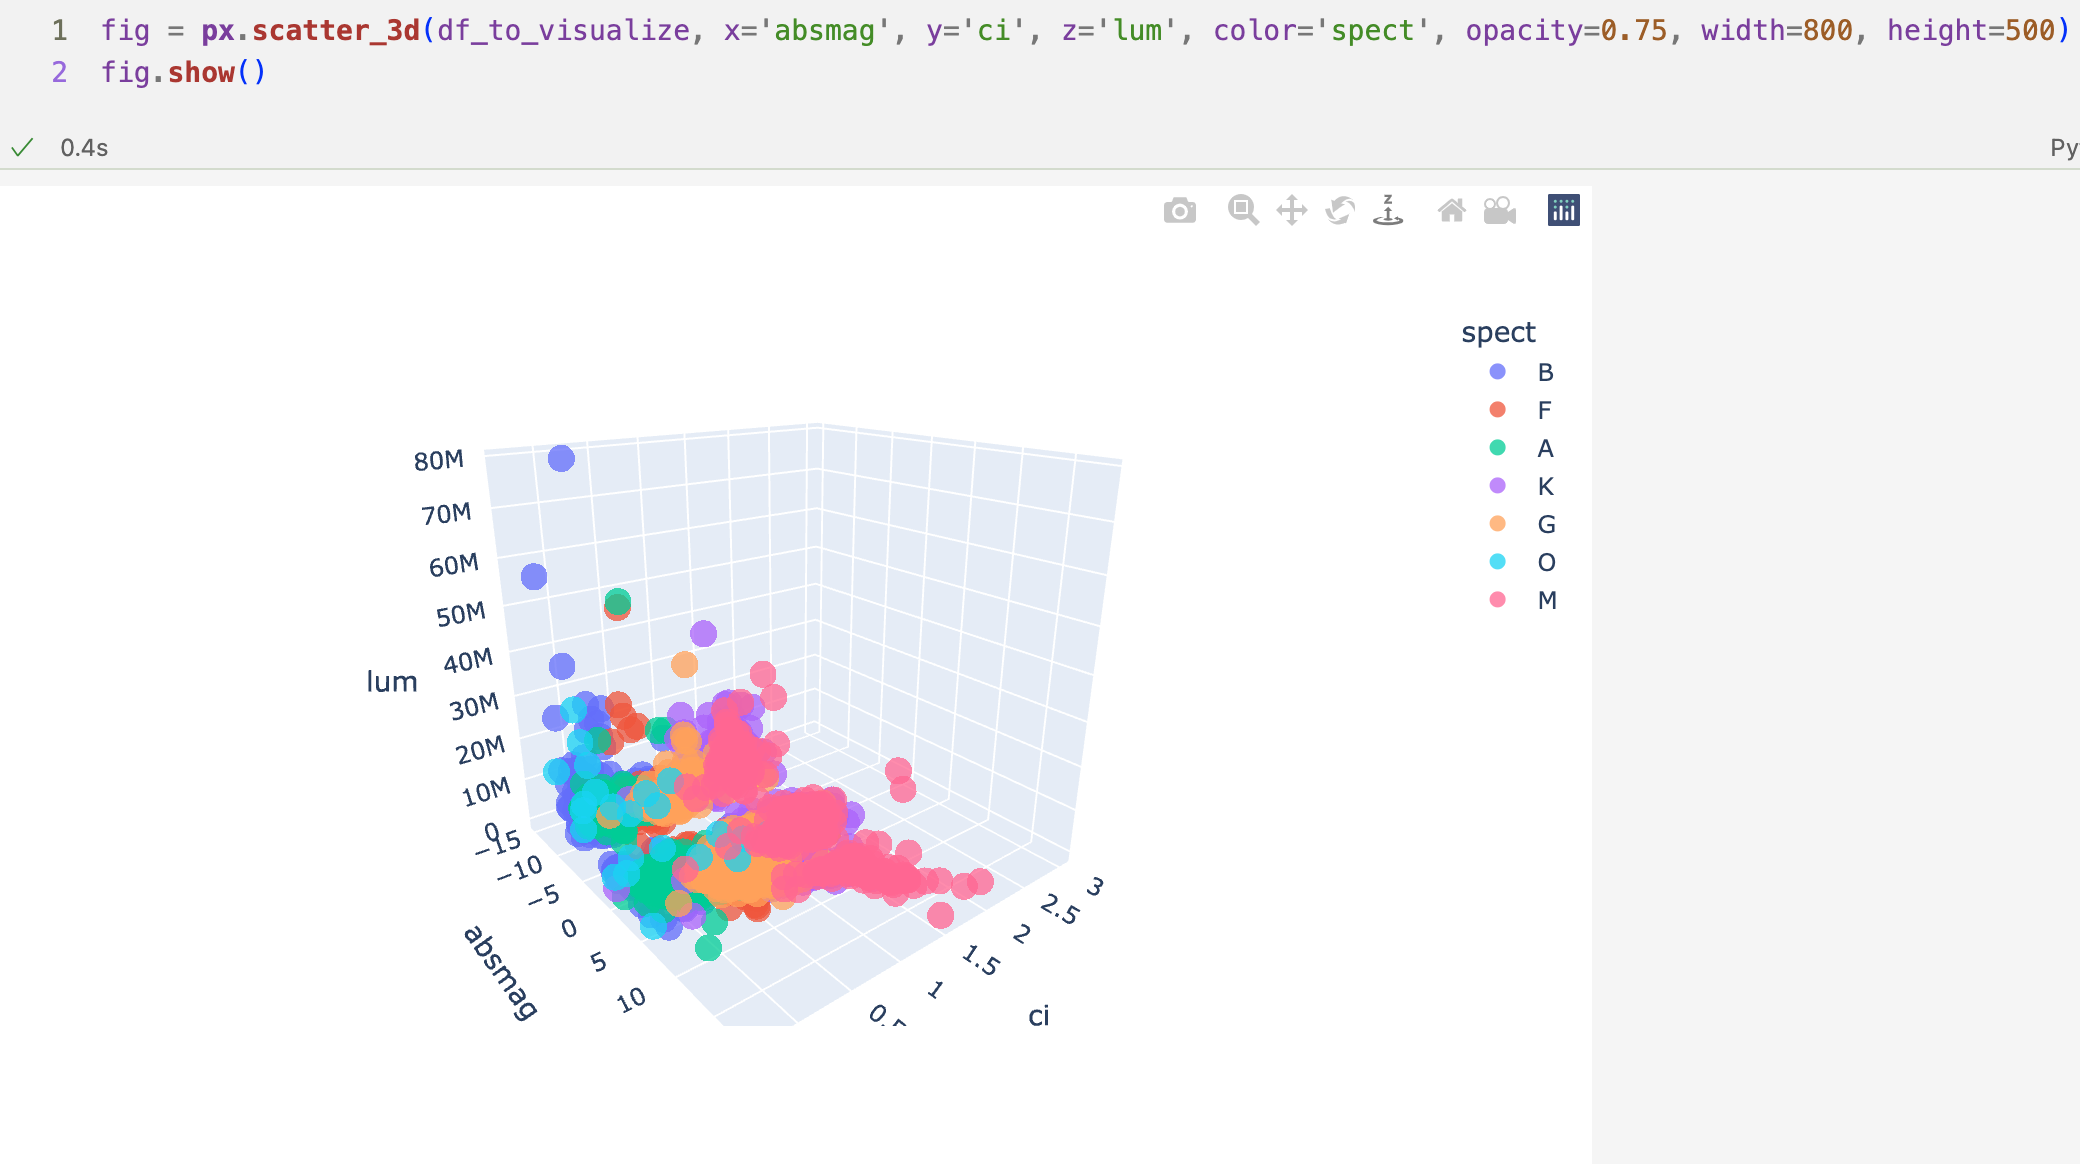

In [33]:
# If the above 3D interactive graph is not rendered, check out the image below
Image('img/absmagcilum.png')

# Evaluation Metrics

For our KNN classifier, we would like to use accuracy and precision to determine how good our model is. Specifically, we would like to use sklearn.metrics.accuracy_score and sklearn.metrics.average_precision_score to evaluate the performance of our model.

Accuracy indicates how many correct data points we can get from the overall data set. This is an important factor to help us to evaluate our training model. The way the accuracy is defined is by using true positives and true negatives divided by the number of true positives, true negatives, false positives, and false negatives. The equation is shown below:

$ {Accuracy} = \frac {True Positives + True Negatives}{True Positives + True Negatives + False Positives + False Negatives} $

We want our accuracy as high as possible because the higher the accuracy, the better our classifier can make the right classifications.

Precision is the quality of the positive prediction generated by the training model. It refers to the number of true positives divided by the total number of positive predictions. The equation is shown below:

$ {Precision} = \frac {True Positives}{True Positives + False Positives} $

We also want our precision as high as possible because the higher our precision, the lower the chance the classifier can make false positive results.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

# Baseline Model

In [ ]:
X = HYG.loc[:, ['absmag', 'ci', 'lum']]
y = HYG.loc[:, ['spect']]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
param_grid = {
    'n_neighbors': range(5, 20)
}
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3, cv=kf, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_estimator_

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head()

In [ ]:
grid.score(X_test, y_test)

# Advanced & Fine-tuned Model

## Decision Tree Classifier

In [ ]:
param_grid_1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(5, 15),
    'min_samples_split': range(2, 10)
    }
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

grid_1 = GridSearchCV(DecisionTreeClassifier(), param_grid_1, cv=kf, scoring='accuracy')
grid_1.fit(X_train, y_train)
grid_1.best_estimator_

In [ ]:
pd.DataFrame(grid_1.cv_results_).sort_values(by='rank_test_score').head()

In [ ]:
grid_1.score(X_test, y_test)

## TensorFlow

In [ ]:
tf.convert_to_tensor(X_train)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

In [ ]:
# test normalizer
normalizer(X_train)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [ ]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
model = get_basic_model()
model.fit(X_train, y_train, epochs = 15, batch_size = 100)

In [ ]:
model.evaluate(X_test, y_test, verbose = 2)

# Results

You may have done tons of work on this. Not all of it belongs here. 


Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1 -- Data Cleaning and Feature Engineering

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2 -- Data Visualization and Feature Selection

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3 -- Baseline Model

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4 -- Advanced and Fine-tuned Models

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 -- Model Performance Comparision and Selection

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy
Since we are doing all the work related to star and astronomy, our project will not relate to any people or society. We do not need informed consent since we don’t have an object to be consent. All our data are from astronomy institution, and we will not collect any data through collection or survey which means we will not have collection bias. We also don’t have PII exposure issue and don’t need to consider downstream bias mitigation since we are not dealing with data related to human.

Data storage:
We all get the data source from open source, but all these sources have their own copyright. We will use proper citation to give credit to those institutions who provides these valuable data. We will also follow the guideline with the right to be forgotten. If any institutions delete their data or made their data private during our project, we will need to remove their data. We have several datasets which could be used in this project so we already have a data retention plan.

Analysis:
We will make sure our data analysis will avoid data bias and our result will be honest representation of the dataset. We will keep our analysis private to protect the privacy of original dataset.

Modeling:
We will not have proxy discrimination issue since astronomy data will not have any unfairly discriminatory. We will choose best metric to optimizing our defined metrics and we will explain why we made the decision of the model.

Deployment:
 We will not have redress problem since we are not dealing with human participants. We will make our model able to roll back when necessary, we will also test our concept to make sure that our model with no bias or little bias. We will made this project private to avoid unintended use.

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="MK"></a>1.[^](#MK): https://starparty.com/topics/astronomy/stars/the-morgan-keenan-system/<br>
<a name="stellartemp"></a>2.[^](#stellartemp): https://www.secretsofuniverse.in/measuring-temperature-of-stars/<br>
<a name="stellartemp"></a>3.[^](#infrared): Blackwell, D. E., Petford, A. D., & Shallis, M. J. (1980). Use of the infra-red flux method for determining stellar effective temperatures and angular diameters-The stellar temperature scale. Astronomy and Astrophysics, 82, 249-252.<br>
<a name="gaia"></a>4.[^](#gaia): Mucciarelli, A., Bellazzini, M., & Massari, D. (2021). Exploiting the Gaia EDR3 photometry to derive stellar temperatures. Astronomy & Astrophysics, 653, A90.<br>
